<a href="https://colab.research.google.com/github/naenumtou/learnTensorFlow/blob/main/COVIDXRay/COVIDXRayTrainingModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Set auto reload
%reload_ext autoreload
%autoreload 2

In [ ]:
# Change working directory
%cd /content/drive/My Drive/Colab Notebooks/COVIDXRay

/content/drive/My Drive/Colab Notebooks/COVIDXRay


In [ ]:
# Import libraries
import pickle
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Neural network
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.xception import Xception

# Checking GPU available
if tf.test.gpu_device_name() == '/device:GPU:0':
  print('GPU is available')
else:
  print('GPU is not available')

print(f'Tensorflow version: {tf.__version__}')

# Config
%config InlineBackend.figure_format = 'retina' #Retina display

GPU is available
Tensorflow version: 2.7.0


In [ ]:
# Import data
X = pickle.load(open('featuresCOVIDXRay.pk', 'rb'))
y = pickle.load(open('targetsCOVIDXRay.pk', 'rb'))

# Normalisation featuers
X = X / 255.0

In [ ]:
# Neural network parameters
BS = 16
EPOCHS = 20
RATE = 0.001
CLASSES = 1 #Normal or COVID-19

# Optimizer
opt = Adam(
    learning_rate = RATE,
    decay = RATE / EPOCHS
)

In [ ]:
# CNN Model
modelCNN = Sequential()
modelCNN.add(
    Conv2D(
        256,
        (3, 3),
        activation = 'relu',
        input_shape = X.shape[1:]
    )
)
modelCNN.add(
    MaxPooling2D(pool_size = (2, 2))
)
modelCNN.add(
    Conv2D(
        256,
        (3, 3),
        activation = 'relu'
    )
)
modelCNN.add(
    MaxPooling2D(pool_size = (2, 2))
)
modelCNN.add(Flatten())
modelCNN.add(Dense(64))
modelCNN.add(Dropout(0.5))
modelCNN.add(
    Dense(
        CLASSES,
        activation = 'sigmoid'
    )
)

# Complie model
modelCNN.compile(
    loss = 'binary_crossentropy',
    optimizer = opt,
    metrics = ['accuracy']
)

# Model summary
modelCNN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 256)     7168      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 256)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 256)       590080    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 256)      0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 230400)            0         
                                                                 
 dense (Dense)               (None, 64)                1

In [ ]:
# Training model
modelCNN.fit(
    X,
    y,
    batch_size = BS,
    epochs = EPOCHS,
    validation_split = 0.3
)

Epoch 1/20
81/81 [==============================] - 22s 134ms/step - loss: 0.6769 - accuracy: 0.8876 - val_loss: 0.0857 - val_accuracy: 0.9765
Epoch 2/20
81/81 [==============================] - 9s 116ms/step - loss: 0.0834 - accuracy: 0.9659 - val_loss: 0.1390 - val_accuracy: 0.9567
Epoch 3/20
81/81 [==============================] - 9s 115ms/step - loss: 0.0637 - accuracy: 0.9760 - val_loss: 0.0467 - val_accuracy: 0.9819
Epoch 4/20
81/81 [==============================] - 9s 116ms/step - loss: 0.0428 - accuracy: 0.9845 - val_loss: 1.7012 - val_accuracy: 0.6625
Epoch 5/20
81/81 [==============================] - 9s 115ms/step - loss: 0.1371 - accuracy: 0.9659 - val_loss: 0.0773 - val_accuracy: 0.9765
Epoch 6/20
81/81 [==============================] - 9s 115ms/step - loss: 0.0508 - accuracy: 0.9822 - val_loss: 0.0504 - val_accuracy: 0.9801
Epoch 7/20
81/81 [==============================] - 10s 124ms/step - loss: 0.0338 - accuracy: 0.9899 - val_loss: 0.0825 - val_accuracy: 0.9819
Epoc

In [ ]:
# Save model
modelCNN.save('COVID19CNN.model')

INFO:tensorflow:Assets written to: COVID19CNN.model/assets


In [ ]:
# Transfer learning with Xception
baseModel = Xception(
    include_top = False, #Transfer learning
    weights = 'imagenet',
    input_shape = X.shape[1:]
)

# Create neural network
modelTrans = Sequential()
modelTrans.add(baseModel)
modelTrans.add(Flatten())
modelTrans.add(Dense(64, activation = 'relu'))
modelTrans.add(Dense(CLASSES, activation = 'sigmoid')) #Output layer

# Compile model
modelTrans.compile(
    optimizer = opt,
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

# Model summary
modelTrans.summary()

83697664/83683744 [==============================] - 1s 0us/step
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 4, 4, 2048)        20861480  
                                                                 
 flatten_1 (Flatten)         (None, 32768)             0         
                                                                 
 dense_2 (Dense)             (None, 64)                2097216   
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 22,958,761
Trainable params: 22,904,233
Non-trainable params: 54,528
_________________________________________________________________


In [ ]:
# Training model
modelTrans.fit(
    X,
    y,
    batch_size = BS,
    epochs = EPOCHS,
    validation_split = 0.3
)

Epoch 1/20
81/81 [==============================] - 30s 275ms/step - loss: 1.0882 - accuracy: 0.8527 - val_loss: 89134.4297 - val_accuracy: 0.8375
Epoch 2/20
81/81 [==============================] - 20s 250ms/step - loss: 0.1883 - accuracy: 0.9341 - val_loss: 2222.9600 - val_accuracy: 0.8610
Epoch 3/20
81/81 [==============================] - 20s 250ms/step - loss: 0.1157 - accuracy: 0.9527 - val_loss: 0.1103 - val_accuracy: 0.9404
Epoch 4/20
81/81 [==============================] - 20s 250ms/step - loss: 0.0994 - accuracy: 0.9620 - val_loss: 0.0849 - val_accuracy: 0.9549
Epoch 5/20
81/81 [==============================] - 20s 250ms/step - loss: 0.0703 - accuracy: 0.9674 - val_loss: 0.0787 - val_accuracy: 0.9585
Epoch 6/20
81/81 [==============================] - 20s 250ms/step - loss: 0.0773 - accuracy: 0.9736 - val_loss: 0.0561 - val_accuracy: 0.9711
Epoch 7/20
81/81 [==============================] - 20s 251ms/step - loss: 0.0609 - accuracy: 0.9814 - val_loss: 0.0485 - val_accuracy:

In [ ]:
# Save model
modelTrans.save('COVID19Xception.model')

INFO:tensorflow:Assets written to: COVID19Xception.model/assets


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


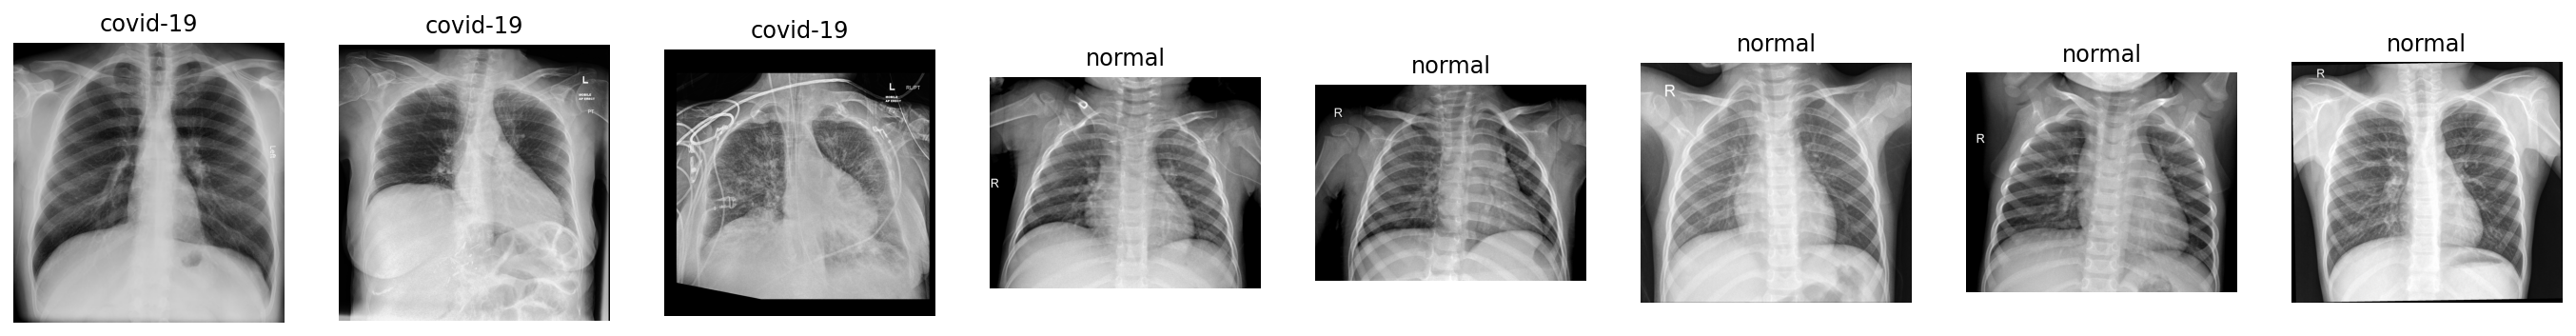

In [ ]:
# Image files
images = [
          'covid-19_01.jpg',
          'covid-19_02.jpg',
          'covid-19_03.jpg',
          'normal_01.jpg',
          'normal_02.jpg',
          'normal_03.jpg',
          'normal_04.jpg',
          'normal_05.jpg'
]

# Show images
plt.figure(figsize = (24, 10))
for i, imageFile in enumerate(images):
  plt.subplot(1, len(images), i + 1)
  image = cv2.imread(imageFile) #BGR
  plt.imshow(image[:, :, ::-1]) #RGB
  plt.title(f"{imageFile[:imageFile.index('_')]}")
  plt.axis('off')  
plt.show()

In [ ]:
# Output labels
size = 128 #Image size
labels = ['normal', 'covid-19']

# Define testing function
def imagePredict(imageTest, predictor):
  plt.figure(figsize = (24, 10))
  for i, imageFile in enumerate(imageTest):
    plt.subplot(1, len(imageTest), i + 1)
    imageRaw = cv2.imread(imageFile) #BGR
    # Image processing for NN Model
    image = cv2.resize(imageRaw, (size, size))
    image = image.reshape(-1, size, size, 3)
    image = image / 255.0
    # Prediction
    if predictor == 'CNN':
      model = modelCNN
    else:
      model = modelTrans
    label = labels[round(model.predict(image, batch_size = BS)[0][0])] #Predict prob of 0-1
    plt.imshow(imageRaw[:, :, ::-1])
    plt.title(f"True: {imageFile[:imageFile.index('_')]}\nPrediction: {label}")
    plt.axis('off')  
  return plt.show()

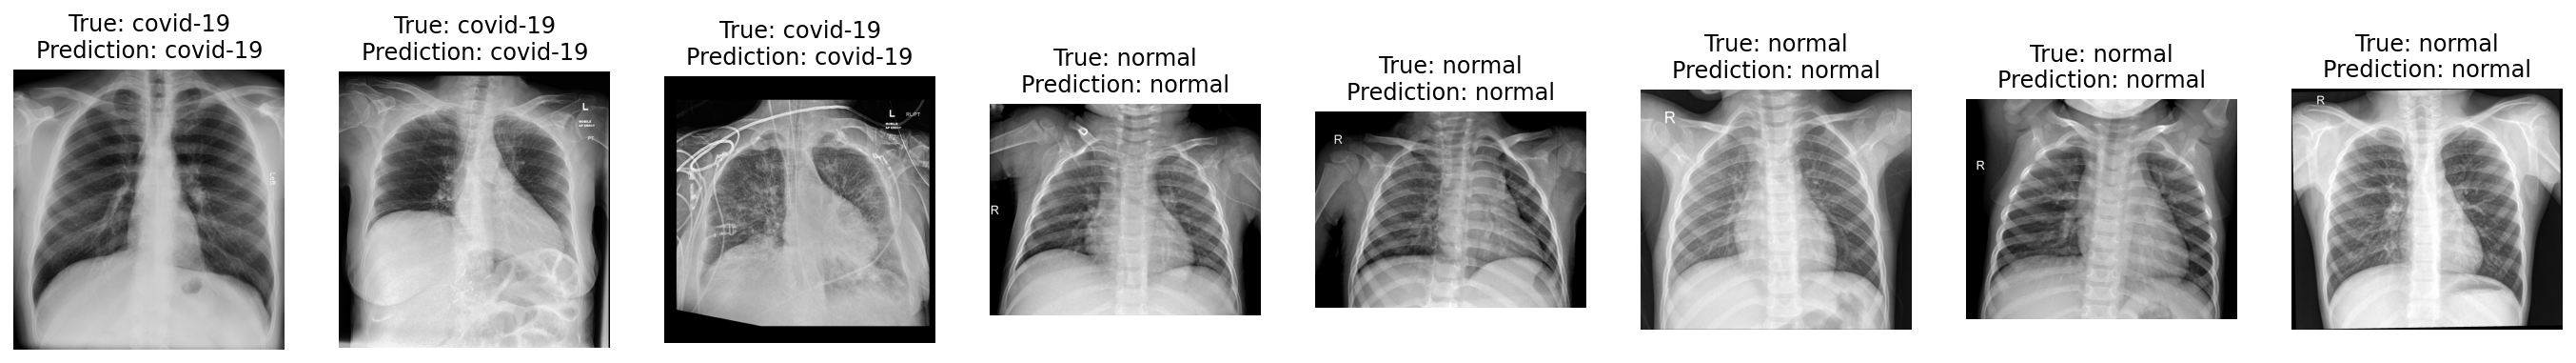

In [ ]:
# Testing CNN Model
imagePredict(images, 'CNN')

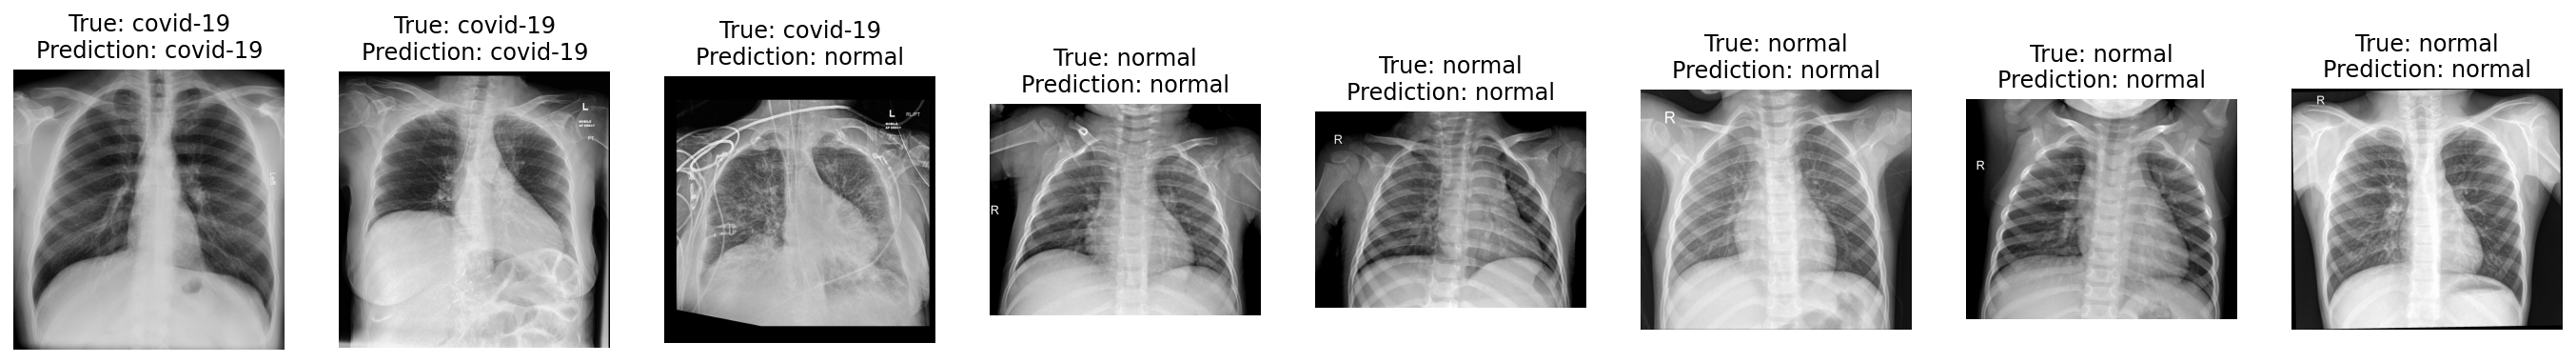

In [ ]:
# Testing Xception model
imagePredict(images, 'Xception')